In [35]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [36]:
df=df[df['job_title_short']=='Data Analyst']
# df

In [37]:
# df_exploded=df.explode('job_skills')
# df_exploded.groupby('job_skills').agg(
#     skill_count=('job_skills','count'),
#     median_salary=('salary_year_avg','median')
# )
## We are going to assign these to variable
df_exploded=df.explode('job_skills')
skill_stats=df_exploded.groupby('job_skills').agg(
 skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(10)



<function matplotlib.pyplot.show(close=None, block=None)>

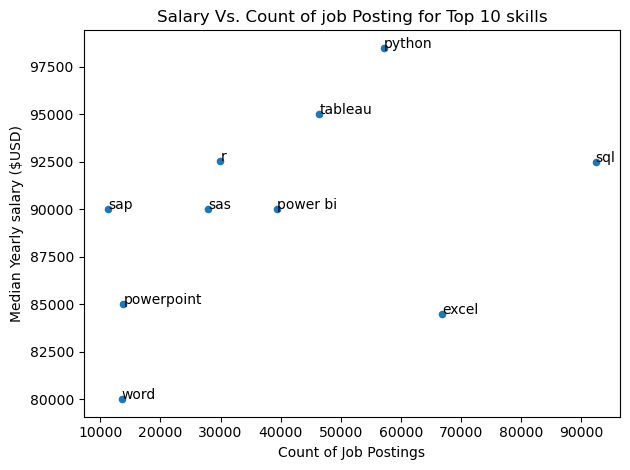

In [38]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.title('Salary Vs. Count of job Posting for Top 10 skills')
plt.ylabel('Median Yearly salary ($USD)')
plt.xlabel('Count of Job Postings')
plt.tight_layout()
## The below code is to get text on points 
for i, txt in enumerate(skill_stats.index):
    # print(i,txt)
 plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i],txt)
plt.show

